In [2]:
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
plt.style.use("figures.mplstyle")

In [3]:
forward_flux_files = {
    "LHC13":{
        "light":["DPMJET", "EPOSLHC", "PYTHIA8", "QGSJET", "SIBYLL"],
        "charm":["BDGJKR", "BKRS", "BKSS", "MS", "SIBYLL"]
    },
    "Large":{
        "light":["EPOSLHC"],
        "charm":["BKRS"]
    },
    "Run3":{
        "light":["EPOSLHC"],
        "charm":["POWHEG+P8monash"]
    },
    "VLarge":{
        "light":["EPOSLHC","SIBYLL"],
        "charm":["BKRS"]
    }
}
primaries = [12,-12,
             14,-14,
             16,-16
            ]
datasets={"SINE_CMS_West":["CC"],
           "UNDINE_CMS_East":["CC","NC"]}
data = {}
for detector,xs_models in datasets.items():
    for xs_model in xs_models:
        for prefix,parent_dict in forward_flux_files.items():
            if prefix!="LHC13": continue
            for parent,generators in parent_dict.items():
                for generator in generators:
                    for primary in primaries:
                        if "SINE" in detector and abs(primary)!=14: continue
                        if parent=="light" and abs(primary)==16: continue
                        key = tuple((detector,xs_model,prefix,generator,parent,primary))
                        print(key)
                        if xs_model=="CC": 
                            siren_output_file = "Data/SIREN/Output/%s/%s_%s_%s_%s"%(detector,prefix,generator,parent,primary)
                            compressed_output_file = "Data/SIREN/Output/%s/compressed/%s_%s_%s_%s"%(detector,prefix,generator,parent,primary)
                        else: 
                            siren_output_file = "Data/SIREN/Output/%s/%s_%s_%s_%s_%s"%(detector,prefix,generator,parent,primary,xs_model)
                            compressed_output_file = "Data/SIREN/Output/%s/compressed/%s_%s_%s_%s_%s"%(detector,prefix,generator,parent,primary,xs_model)
                        #try:
                        data[key] = ak.from_parquet(compressed_output_file+".parquet")
                        #if "SINE" in detector: 
                        #    tmp_data = tmp_data[tmp_data.hit_mask_muon_survival]
                        #elif "UNDINE" in detector: 
                        #    tmp_data = tmp_data[np.array(tmp_data.in_fiducial)[:,-1]]
                        #ak.to_parquet(tmp_data,compressed_output_file+".parquet")
                        # except:
                        #     print("Couldn't open %s"%siren_output_file)
                

('SINE_CMS_West', 'CC', 'LHC13', 'DPMJET', 'light', 14)
('SINE_CMS_West', 'CC', 'LHC13', 'DPMJET', 'light', -14)
('SINE_CMS_West', 'CC', 'LHC13', 'EPOSLHC', 'light', 14)
('SINE_CMS_West', 'CC', 'LHC13', 'EPOSLHC', 'light', -14)
('SINE_CMS_West', 'CC', 'LHC13', 'PYTHIA8', 'light', 14)
('SINE_CMS_West', 'CC', 'LHC13', 'PYTHIA8', 'light', -14)
('SINE_CMS_West', 'CC', 'LHC13', 'QGSJET', 'light', 14)
('SINE_CMS_West', 'CC', 'LHC13', 'QGSJET', 'light', -14)
('SINE_CMS_West', 'CC', 'LHC13', 'SIBYLL', 'light', 14)
('SINE_CMS_West', 'CC', 'LHC13', 'SIBYLL', 'light', -14)
('SINE_CMS_West', 'CC', 'LHC13', 'BDGJKR', 'charm', 14)
('SINE_CMS_West', 'CC', 'LHC13', 'BDGJKR', 'charm', -14)
('SINE_CMS_West', 'CC', 'LHC13', 'BKRS', 'charm', 14)
('SINE_CMS_West', 'CC', 'LHC13', 'BKRS', 'charm', -14)
('SINE_CMS_West', 'CC', 'LHC13', 'BKSS', 'charm', 14)
('SINE_CMS_West', 'CC', 'LHC13', 'BKSS', 'charm', -14)
('SINE_CMS_West', 'CC', 'LHC13', 'MS', 'charm', 14)
('SINE_CMS_West', 'CC', 'LHC13', 'MS', 'charm', 

# paper figures from SIREN

EPOSLHC BKSS
DPMJET BKRS
SIBYLL SIBYLL
QGSJET BDGJKR
PYTHIA8 MS
EPOSLHC BKSS
DPMJET BKRS
SIBYLL SIBYLL
QGSJET BDGJKR
PYTHIA8 MS
EPOSLHC BKSS
DPMJET BKRS
SIBYLL SIBYLL
QGSJET BDGJKR
PYTHIA8 MS


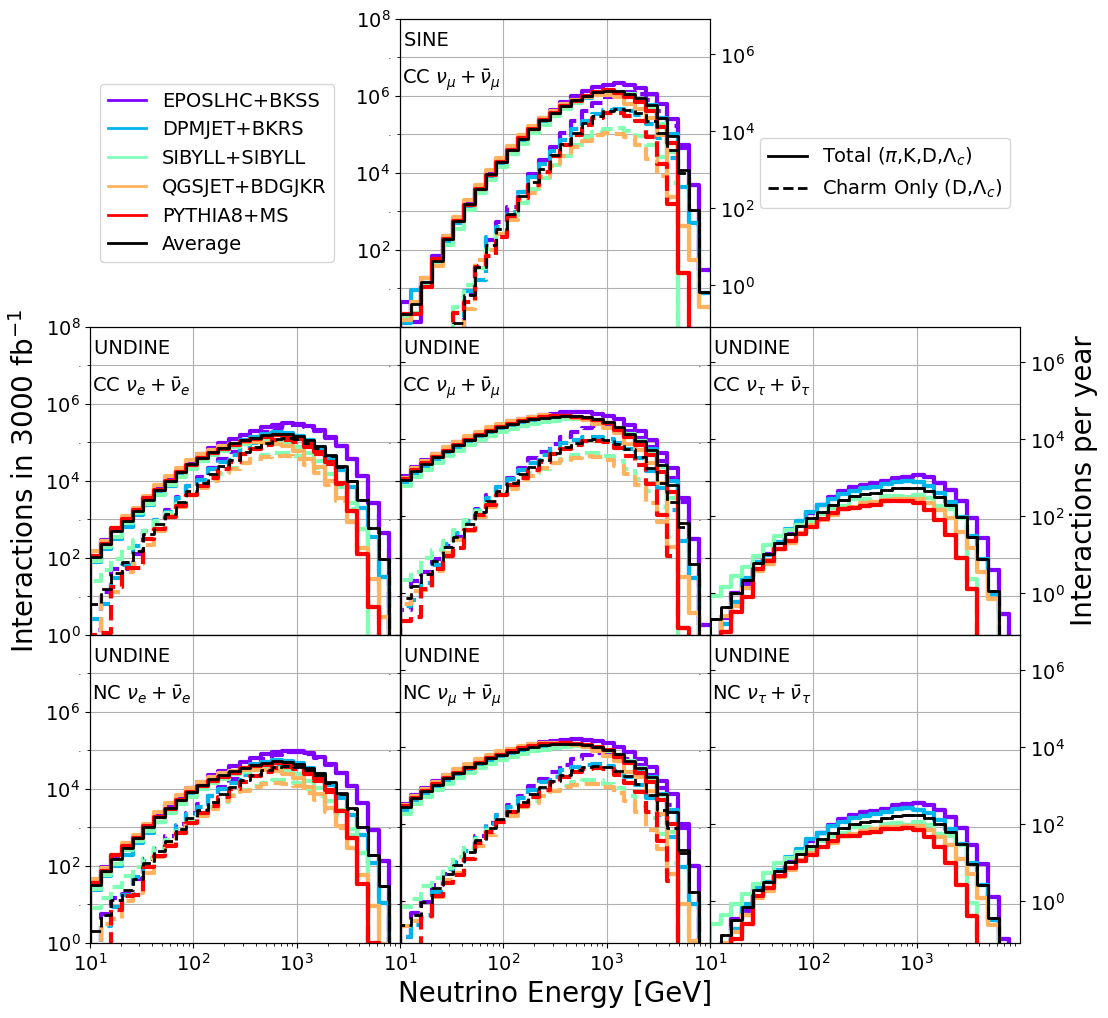

In [5]:
prefix = "LHC13"
num_UNDINE = 5
light_generators = ["EPOSLHC","DPMJET","SIBYLL","QGSJET","PYTHIA8"]
charm_generators = ["BKSS","BKRS","SIBYLL","BDGJKR","MS"]


fig,ax = plt.subplots(3,3,figsize=(12,12))
fig.set_facecolor("white")

twin_ax = np.empty_like(ax)
for i in range(3):
    for j in range(3):
        twin_ax[i,j] = ax[i,j].twinx()
        

fig.subplots_adjust(wspace=0, hspace=0)
ax[0,0].axis("off")
ax[0,2].axis("off")
twin_ax[0,0].axis("off")
twin_ax[0,2].axis("off")

Ebins = np.logspace(1,4,30)
pids = [12,14,16]

yearly_factor = 250./3000. # 250 fb^-1 per year / 3 ab^-1 total

total_rates = {}
generator_rates = {}
i = -1
for det,xs_models in datasets.items():
    
    for xs_model in xs_models:
        
        i += 1
        
        Ehist_l_avg = {pid:np.zeros(len(Ebins)-1) for pid in pids}
        Ehist_c_avg = {pid:np.zeros(len(Ebins)-1) for pid in pids}
        Ehist_avg = {pid:np.zeros(len(Ebins)-1) for pid in pids}

        color = iter(cm.rainbow(np.linspace(0, 1, len(light_generators))))

        for lg,cg in zip(light_generators,charm_generators):

            c = next(color)
            print(lg,cg)

            lkey = tuple((det,xs_model,prefix,lg,"light"))
            ckey = tuple((det,xs_model,prefix,cg,"charm"))



            for iax,pid in enumerate(pids):



                if pid!=16 and not (pid!=14 and "SINE" in det):
                    ldata = ak.concatenate([data[lkey+(pid,)],data[lkey+(-pid,)]])
                    weights = np.array(ldata.weights)
                    if "SINE" in det: weights *= np.array(ldata.hit_mask_muon_survival)
                    if "UNDINE" in det: weights *= num_UNDINE*np.array(ldata.in_fiducial)[:,-1]
                    #vx = np.squeeze(ldata.vertex)
                    Ehist_l,_ = np.histogram(ldata.energy,bins=Ebins,weights=weights)
                else:
                    Ehist_l = np.zeros(len(Ebins)-1)
                if not (pid!=14 and "SINE" in det):
                    cdata = ak.concatenate([data[ckey+(pid,)],data[ckey+(-pid,)]])
                    weights = np.array(cdata.weights)
                    if "SINE" in det: weights *= np.array(cdata.hit_mask_muon_survival)
                    if "UNDINE" in det: weights *= num_UNDINE*np.array(cdata.in_fiducial)[:,-1]
                    #vx = np.squeeze(cdata.vertex)
                    Ehist_c,_ = np.histogram(cdata.energy,bins=Ebins,weights=weights)
                else:
                    Ehist_c = np.zeros(len(Ebins)-1)


                Ehist = np.array(Ehist_l+Ehist_c)
                Ehist_avg[pid] += Ehist/len(light_generators)
                Ehist_l_avg[pid] += np.array(Ehist_l)/len(light_generators)
                Ehist_c_avg[pid] += np.array(Ehist_c)/len(charm_generators)
                generator_rates[lkey+(pid,)] = sum(Ehist_l)
                generator_rates[ckey+(pid,)] = sum(Ehist_c)
                if i==0 and iax==0:
                    ax[i,iax].step([],[],color=c,label="%s+%s"%(lg,cg))
                elif i!=0 or iax !=2:
                    ax[i,iax].step(Ebins,np.append([0],Ehist),color=c,lw=3)
                    ax[i,iax].step(Ebins,np.append([0],Ehist_c),color=c,ls="--",lw=3)

        for iax,pid in enumerate(pids):
            total_rates[tuple((det,xs_model,"light",pid))] = sum(Ehist_l_avg[pid])
            total_rates[tuple((det,xs_model,"charm",pid))] = sum(Ehist_c_avg[pid])    
            if not(i==0 and iax!=1):
                ax[i,iax].step(Ebins,np.append([0],Ehist_c_avg[pid]),color="black",ls="--")
                ax[i,iax].step(Ebins,np.append([0],Ehist_avg[pid]),color="black")
            elif i==0 and iax==0:
                 ax[i,iax].plot([],[],label="Average",color="black")
            
ax[2,1].set_xlabel("Neutrino Energy [GeV]",fontsize=20)
ax[1,0].set_ylabel(r"Interactions in $3000~{\rm fb}^{-1}$",fontsize=20)
twin_ax[1,2].set_ylabel(r"Interactions per year",fontsize=20)
ax[0,2].plot([],[],color="black",label=r"Total ($\pi$,K,D,$\Lambda_c$)")
#ax[0,2].plot([],[],color="black",ls='--',label=r"$\pi$,K")
ax[0,2].plot([],[],color="black",ls='--',label=r"Charm Only (D,$\Lambda_c$)")
ax[0,0].legend(loc="center left",fontsize=14)
ax[0,2].legend(loc="center right",fontsize=14)

det_labels = ["SINE CC","UNDINE CC", "UNDINE NC"]
particle_labels = [r"$\nu_e+\bar{\nu}_e$",
                   r"$\nu_\mu+\bar{\nu}_\mu$",
                   r"$\nu_\tau+\bar{\nu}_\tau$"]
for i in [0,1,2]:
    for j in [0,1,2]:
            
        ax[i,j].set_xlim(1e1,Ebins[-1])
        ax[i,j].set_ylim(1e0,1e8)
        ax[i,j].set_xlim(1e1,1e4)
        ax[i,j].tick_params(axis='both', which='major', labelsize=14)
        ax[i,j].tick_params(axis='both', which='minor', labelsize=0)
        twin_ax[i,j].tick_params(axis='both', which='major', labelsize=14)
        ax[i,j].get_xaxis().grid(True,which='major')
        ax[i,j].get_yaxis().grid(True,which='both')
        
        if not(i==0 and j in [0,2]):
            ax[i,j].text(11,2e7,det_labels[i][:-2],fontsize=14)
            ax[i,j].text(10.5,2e6,det_labels[i][-2:]+" "+ particle_labels[j],fontsize=14)
            ax[i,j].loglog()
            mn, mx = ax[i,j].get_ylim()
            twin_ax[i,j].set_ylim(mn*yearly_factor, mx*yearly_factor)
            twin_ax[i,j].loglog()
        
        # xticks
        if i!=2: 
            ax[i,j].set_xticklabels([])
        if i!= 0: 
            ax[i,j].set_xticks(np.logspace(1,3,3))
        
        # yticks
        if i==0 and j==1:
            ax[i,j].set_yticks(np.logspace(2,8,4))
            ax[i,j].set_yticks(np.logspace(1,8,8),minor=True)
        elif i==1 and j==0:
            ax[i,j].set_yticks(np.logspace(0,8,5))
            ax[i,j].set_yticks(np.logspace(0,8,9),minor=True)
        elif i==2 and j==0:
            ax[i,j].set_yticks(np.logspace(0,6,4))
            ax[i,j].set_yticks(np.logspace(0,7,8),minor=True)
        else:
            ax[i,j].set_yticks(np.logspace(0,8,9),minor=True)
            ax[i,j].set_yticklabels([])
        
        if (i==0 and j==1) or (j==2 and i in [1,2]):
            twin_ax[i,j].set_yticks(np.logspace(0,6,4))
        else:
            twin_ax[i,j].set_yticklabels([])

plt.savefig("Figures/SIREN/Distributions.pdf",dpi=100)
plt.show()
            

In [6]:
for detector,xs_models in datasets.items():
    for xs_model in xs_models:
        if xs_model=="NC":
            rate_light = 0
            rate_charm = 0
            for pid in pids:
                rate_light += total_rates[tuple((detector,xs_model,"light",pid))]
                rate_charm += total_rates[tuple((detector,xs_model,"charm",pid))]
            print("%s (%s %s) & %s & %s & %s \\\\"%("SINE" if "SINE" in detector else "UNDINE",
                                               xs_model,"$\\nu_\\alpha + \\bar{\\nu}_\\alpha$",
                                               "$10^{%1.2f}$"%np.log10(rate_light+rate_charm),
                                               "$10^{%1.2f}$"%np.log10(rate_light) if rate_light > 0 else "0",
                                               "$10^{%1.2f}$"%np.log10(rate_charm)))
        else:
            for pid,pid_label in zip(pids,particle_labels):
                if pid!=14 and "SINE" in detector: continue
                rate_light = total_rates[tuple((detector,xs_model,"light",pid))]
                rate_charm = total_rates[tuple((detector,xs_model,"charm",pid))]

                print("%s (%s %s) & %s & %s & %s \\\\"%("SINE" if "SINE" in detector else "UNDINE",
                       xs_model,pid_label,
                       "$10^{%1.2f}$"%np.log10(rate_light+rate_charm),
                       "$10^{%1.2f}$"%np.log10(rate_light) if rate_light > 0 else "0",
                       "$10^{%1.2f}$"%np.log10(rate_charm)))
                

SINE (CC $\nu_\mu+\bar{\nu}_\mu$) & $10^{7.00}$ & $10^{6.87}$ & $10^{6.44}$ \\
UNDINE (CC $\nu_e+\bar{\nu}_e$) & $10^{6.17}$ & $10^{5.73}$ & $10^{5.97}$ \\
UNDINE (CC $\nu_\mu+\bar{\nu}_\mu$) & $10^{6.75}$ & $10^{6.68}$ & $10^{5.96}$ \\
UNDINE (CC $\nu_\tau+\bar{\nu}_\tau$) & $10^{4.79}$ & 0 & $10^{4.79}$ \\
UNDINE (NC $\nu_\alpha + \bar{\nu}_\alpha$) & $10^{6.35}$ & $10^{6.22}$ & $10^{5.78}$ \\


# Charm production model sensitivity

In [1]:
from scipy.interpolate import interp1d
e_knots = [50, 100, 200, 500, 1000, 2000, 5000]
nu_cc_up = interp1d(e_knots,[4.1,3.8,3.5,3.2,3.0,2.7,2.3],fill_value="extrapolate")
nu_cc_down = interp1d(e_knots,[2.4,2.0,1.0,1.9,1.7,1.6,1.5],fill_value="extrapolate")
nu_nc_up = interp1d(e_knots,[3.8,3.5,3.2,2.9,2.7,2.4,2.1],fill_value="extrapolate")
nu_nc_down = interp1d(e_knots,[2.0,1.8,1.7,1.5,1.5,1.4,1.3],fill_value="extrapolate")
nubar_cc_up = interp1d(e_knots,[15.0,13.3,11.9,10.5,9.4,8.3,6.5],fill_value="extrapolate")
nubar_cc_down = interp1d(e_knots,[9.0,7.4,6.5,5.7,5.2,4.6,3.7],fill_value="extrapolate")
nubar_nc_up = interp1d(e_knots,[12.0,10.7,9.6,8.6,7.8,7.0,5.7],fill_value="extrapolate")
nubar_nc_down = interp1d(e_knots,[6.4,5.7,5.1,4.6,4.2,3.8,3.2],fill_value="extrapolate")

def throw_pseudoexperiments(N):
    pseudoexp_rates = {}
    
    nu_cc_throws = np.random.normal(size=(N))
    nu_nc_throws = np.random.normal(size=(N))
    nubar_cc_throws = np.random.normal(size=(N))
    nubar_nc_throws = np.random.normal(size=(N))
    
    for det,xs_models in datasets.items():
        for xs_model in xs_models:
            print(det,xs_model)

            
            for lg,cg in zip(light_generators,charm_generators):

                lkey = tuple((det,xs_model,prefix,lg,"light"))
                ckey = tuple((det,xs_model,prefix,cg,"charm"))



                for iax,pid in enumerate(pids):
                    
                    lkey_nu = lkey+(pid,)
                    lkey_nubar = lkey+(-pid,)
                    ckey_nu = ckey+(pid,)
                    ckey_nubar = ckey+(-pid,)
                    
                    ldata_nu = data[lkey_nu] if lkey_nu in data.keys() else None
                    ldata_nubar = data[lkey_nubar] if lkey_nubar in data.keys() else None
                    cdata_nu = data[ckey_nu] if ckey_nu in data.keys() else None
                    cdata_nubar = data[ckey_nubar] if ckey_nubar in data.keys() else None
                        
                        
                    # neutrino sets
                    for key,dataset in zip([lkey_nu,ckey_nu],[ldata_nu,cdata_nu]):
                        if dataset is None: continue
                        if xs_model=="CC":
                            weights = dataset.weights * np.where(np.tile((nu_cc_throws>0)[:, np.newaxis], (1, len(dataset.weights))),
                                                                 1.+(np.outer(nu_cc_throws,nu_cc_up(dataset.energy)/100.)),
                                                                 1.+(np.outer(nu_cc_throws,nu_cc_down(dataset.energy)/100.)))
                        elif xs_model=="NC":
                            weights = dataset.weights * np.where(np.tile((nu_nc_throws>0)[:, np.newaxis], (1, len(dataset.weights))),
                                                                 1.+(np.outer(nu_nc_throws,nu_nc_up(dataset.energy)/100.)),
                                                                 1.+(np.outer(nu_nc_throws,nu_nc_down(dataset.energy)/100.)))
                        # if "SINE" in det: weights *= np.array(dataset.hit_mask_muon_survival)
                        # if "UNDINE" in det: weights *= num_UNDINE*np.array(dataset.in_fiducial)[:,-1]
                        pseudoexp_rates[key] = np.sum(weights,axis=-1)

                    # antineutrino sets
                    for key,dataset in zip([lkey_nubar,ckey_nubar],[ldata_nubar,cdata_nubar]):
                        if dataset is None: continue
                        if xs_model=="CC":
                            weights = dataset.weights * np.where(np.tile((nubar_cc_throws>0)[:, np.newaxis], (1, len(dataset.weights))),
                                                                 1.+(np.outer(nubar_cc_throws,nubar_cc_up(dataset.energy)/100.)),
                                                                 1.+(np.outer(nubar_cc_throws,nubar_cc_down(dataset.energy)/100.)))
                        elif xs_model=="NC":
                            weights = dataset.weights * np.where(np.tile((nubar_nc_throws>0)[:, np.newaxis], (1, len(dataset.weights))),
                                                                 1.+(np.outer(nubar_nc_throws,nubar_nc_up(dataset.energy)/100.)),
                                                                 1.+(np.outer(nubar_nc_throws,nubar_nc_down(dataset.energy)/100.)))
                        # if "SINE" in det: weights *= np.array(dataset.hit_mask_muon_survival)
                        # if "UNDINE" in det: weights *= num_UNDINE*np.array(dataset.in_fiducial)[:,-1]
                        pseudoexp_rates[key] = np.sum(weights,axis=-1)
    return pseudoexp_rates

x = throw_pseudoexperiments(10)

NameError: name 'np' is not defined

EPOSLHC BKSS
DPMJET BKRS
SIBYLL SIBYLL
QGSJET BDGJKR
PYTHIA8 MS


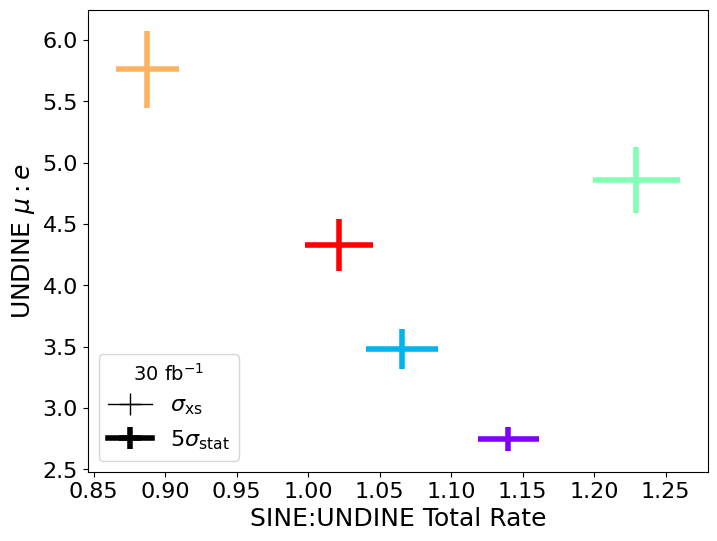

In [21]:
tau_muon_BR = 0.1739
norm_error = 0.03
exposure_factor = 1./100. # one year
nsigma = 5

color = iter(cm.rainbow(np.linspace(0, 1, len(light_generators))))
for lg,cg in zip(light_generators,charm_generators):

    c = next(color)
    print(lg,cg)

    # SINE overall rate
    lkey = tuple(("SINE_CMS_West","CC",prefix,lg,"light"))
    ckey = tuple(("SINE_CMS_West","CC",prefix,cg,"charm"))
    SINE_rate = generator_rates[lkey+(14,)] + generator_rates[ckey+(14,)]
    
    # UNDINE overall rate
    UNDINE_rate = 0
    UNDINE_muons = 0
    UNDINE_electrons = 0
    for xs_model in datasets["UNDINE_CMS_East"]:
        lkey = tuple(("UNDINE_CMS_East",xs_model,prefix,lg,"light"))
        ckey = tuple(("UNDINE_CMS_East",xs_model,prefix,cg,"charm"))
        for pid in pids:
            rate = generator_rates[lkey+(pid,)] + generator_rates[ckey+(pid,)]
            UNDINE_rate += rate
            if xs_model=="CC" and pid==14:
                UNDINE_muons += rate
            if xs_model=="CC" and pid==16:
                UNDINE_muons += tau_muon_BR*rate
            if xs_model=="CC" and pid==12:
                UNDINE_electrons += rate
    
    SINE_rate *= exposure_factor
    UNDINE_rate *= exposure_factor
    UNDINE_muons *= exposure_factor
    UNDINE_electrons *= exposure_factor
    
    r1 = SINE_rate / UNDINE_rate
    r2 = UNDINE_muons / UNDINE_electrons
    r1_err = r1 * np.sqrt((norm_error*SINE_rate/SINE_rate)**2 + (norm_error*total_lake/total_lake)**2)
    r2_err = r2 * np.sqrt((norm_error*tracks_lake/tracks_lake)**2 + (norm_error*cascades_lake/cascades_lake)**2)
    r1_stat_err = r1 * np.sqrt(1/SINE_rate + 1/UNDINE_rate)
    r2_stat_err = r2 * np.sqrt(1/UNDINE_muons + 1/UNDINE_electrons)
    plt.errorbar(r1,r2,xerr=r1_err,yerr=r2_err,color=c,lw=1,label="%s + %s"%(gen_l,gen_c))
    plt.errorbar(r1,r2,xerr=nsigma*r1_stat_err,yerr=nsigma*r2_stat_err,color=c,lw=4)
plt.errorbar([],[],xerr=[],yerr=[],color="black",lw=1,label=r"$\sigma_{\rm xs}$")
plt.errorbar([],[],xerr=[],yerr=[],color="black",lw=4,label=r"$%d \sigma_{\rm stat}$"%nsigma)
plt.legend(title=r"%d ${\rm fb}^{-1}$"%(3000*exposure_factor),loc="lower left")
#plt.xlim(1.1,1.9)
plt.xlabel("SINE:UNDINE Total Rate")
plt.ylabel(r"UNDINE $\mu:e$")
plt.gcf().set_facecolor("white")
plt.gcf().patch.set_alpha(0.0)
plt.savefig("Figures/SIREN/GeneratorDifferntiator.pdf",dpi=100)
plt.show()

In [35]:
x = np.array([-1,1])

In [36]:
x

array([-1,  1])

In [37]:
np.expand_dims(x,-1)

array([[-1],
       [ 1]])

In [39]:
np.tile(x[:, np.newaxis], (1, 100))

array([[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1]])